In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
import urllib
%matplotlib inline

In [81]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [82]:
fetch_housing_data()


In [83]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [84]:
data = load_housing_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [85]:
data.shape

(20640, 10)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [87]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [88]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

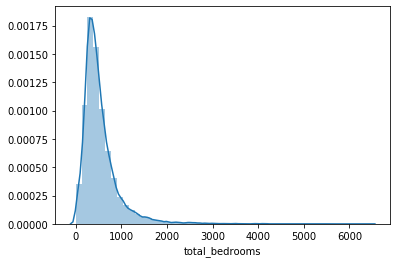

In [89]:
sns.distplot(data['total_bedrooms'])

In [90]:
median = data['total_bedrooms'].median()

In [91]:
data['total_bedrooms'].fillna(median, inplace = True)

In [92]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [93]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [94]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


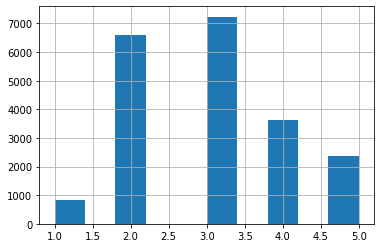

In [95]:
data['income'] = pd.cut(data['median_income'],bins = [0,1.5,3,4.5,6,np.inf],
                       labels=[1,2,3,4,5])
data['income'].hist()

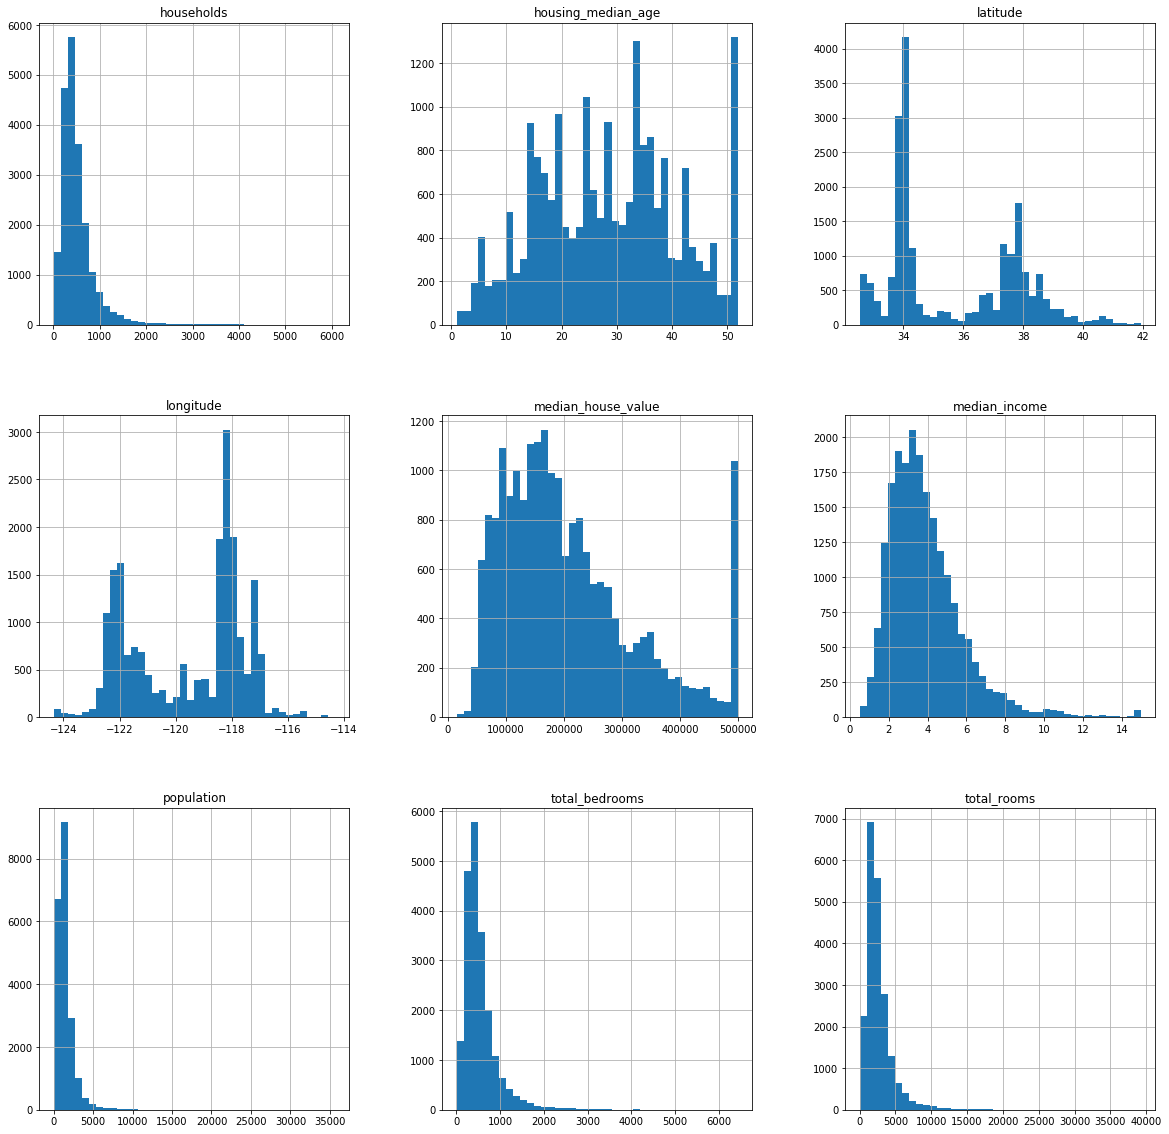

In [96]:
data.hist(bins=40, figsize=(20 , 20))
plt.show()

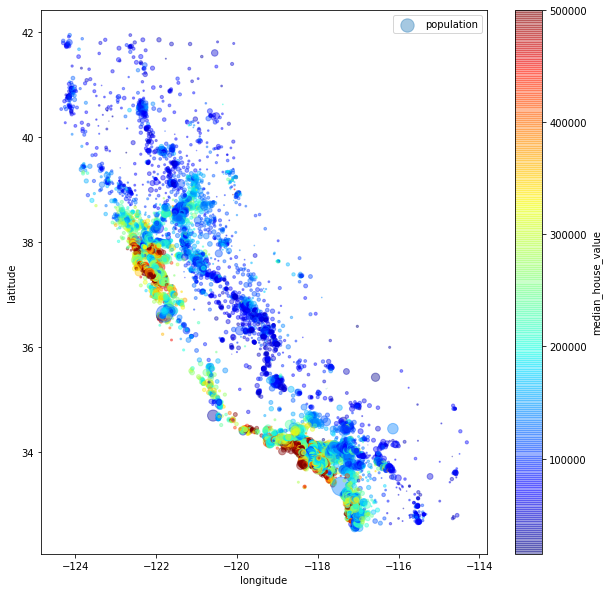

In [97]:
data.plot(kind="scatter", x="longitude", y="latitude" , alpha = .4 ,
          s=data['population']/100 , label = 'population',c = 'median_house_value',
          cmap='jet',colorbar=True,sharex =False,figsize = (10,10))
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA5A01C948>,
      dtype=object)

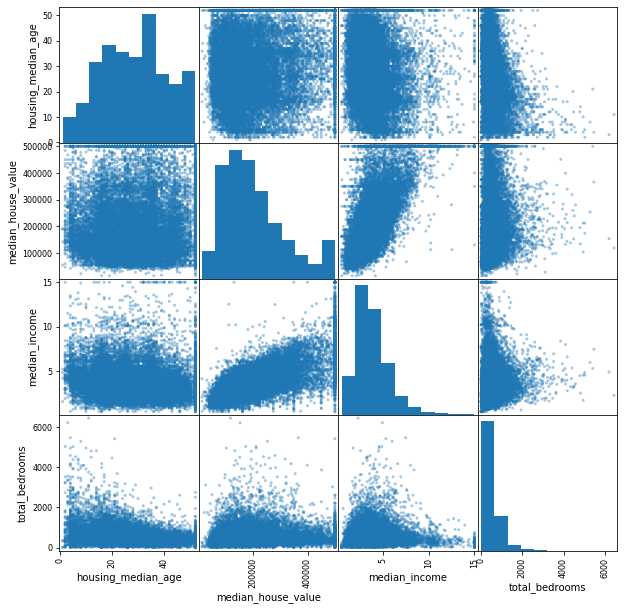

In [98]:
from pandas.plotting import scatter_matrix
attr =['housing_median_age', 'median_house_value' ,'median_income', 'total_bedrooms' ]
pd.plotting.scatter_matrix(data[attr] , alpha = .4 , figsize =(10,10)  )

In [99]:
#sns.pairplot(data , hue = 'median_house_value' , corner = True)

In [100]:
corr=data.corr()
corr['median_house_value'].sort_values(ascending =False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [101]:
data['rooms_per_households']=data['total_rooms']/data['households']
data['bedrooms_per_households']=data['total_bedrooms']/data['households']
data['population_per_households']=data['population']/data['households']


In [102]:
corr=data.corr()
corr['median_house_value'].sort_values(ascending =False)

median_house_value           1.000000
median_income                0.688075
rooms_per_households         0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049457
population_per_households   -0.023737
population                  -0.024650
bedrooms_per_households     -0.045637
longitude                   -0.045967
latitude                    -0.144160
Name: median_house_value, dtype: float64

In [103]:
low_corr = data.corr().median_house_value[data.corr().median_house_value<.1]
low_corr

longitude                   -0.045967
latitude                    -0.144160
total_bedrooms               0.049457
population                  -0.024650
households                   0.065843
bedrooms_per_households     -0.045637
population_per_households   -0.023737
Name: median_house_value, dtype: float64

In [104]:
for col in low_corr.index :
    data.drop(col , axis = 1 , inplace = True)

[0, 5, 0, 500000]

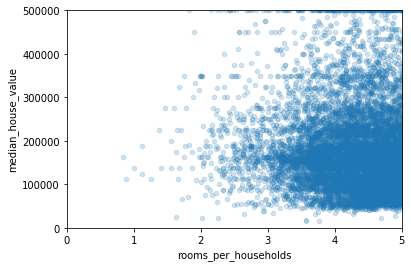

In [105]:
data.plot(kind='scatter' , x = 'rooms_per_households',y='median_house_value' , alpha = .2)
plt.axis([0,5,0,500000])

In [106]:
data.describe()

,housing_median_age,total_rooms,median_income,median_house_value,rooms_per_households
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,3.870671,206855.816909,5.429000
std,12.585558,2181.615252,1.899822,115395.615874,2.474173
min,1.000000,2.000000,0.499900,14999.000000,0.846154
25%,18.000000,1447.750000,2.563400,119600.000000,4.440716
50%,29.000000,2127.000000,3.534800,179700.000000,5.229129
75%,37.000000,3148.000000,4.743250,264725.000000,6.052381
max,52.000000,39320.000000,15.000100,500001.000000,141.909091


In [107]:
data_num =data.drop('ocean_proximity', axis = 1)

In [108]:
cat=data[['ocean_proximity']]
cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [109]:
from sklearn.preprocessing import OrdinalEncoder
ordinal =OrdinalEncoder()
cat_encoded  =ordinal.fit_transform(cat)
cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [110]:
ordinal.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [111]:
from sklearn.preprocessing import OneHotEncoder
hot=OneHotEncoder()
cat_hot = hot.fit_transform(cat)
cat_hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [112]:
cat_hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [113]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pip=Pipeline([
    ('imputer' , SimpleImputer(strategy = 'median')),
 #   ('addr' , CombinedAttributesAdder()),
    ('scale' , StandardScaler())
])
data_num_tr=num_pip.fit_transform(data_num)

In [114]:
from sklearn.compose import ColumnTransformer
num_attr=list(data_num)
cat_attr=['ocean_proximity']
full_pip=ColumnTransformer([
    ('num' ,num_pip,num_attr),
    ('category' , OneHotEncoder() ,cat_attr)
])
final=full_pip.fit_transform(data)

In [175]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1 , random_state = 42 , test_size = 42)
for train_index , test_index in split.split (data , data['income']) :
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]
    

In [176]:
test_set['income'].value_counts()/len(test_set)

3    0.357143
2    0.309524
4    0.166667
5    0.119048
1    0.047619
Name: income, dtype: float64

In [177]:
X_train=train_set.drop('median_house_value' , axis=1)
y_train=train_set['median_house_value']

In [178]:
X_test=test_set.drop('median_house_value' , axis=1)
y_test=test_set['median_house_value']

In [179]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [180]:
#reg.fit(X_train , y_train)

In [181]:
reg.fit(final, data_num)
some_data = data.iloc[:10]
some_labels = data_num.iloc[:10]
some_data_prepared = full_pip.transform(some_data)
print("Predictions:", reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [[4.10000000e+01 8.80000000e+02 8.32520000e+00 4.52600000e+05
  5.00000000e+00 6.98412698e+00]
 [2.10000000e+01 7.09900000e+03 8.30140000e+00 3.58500000e+05
  5.00000000e+00 6.23813708e+00]
 [5.20000000e+01 1.46700000e+03 7.25740000e+00 3.52100000e+05
  5.00000000e+00 8.28813559e+00]
 [5.20000000e+01 1.27400000e+03 5.64310000e+00 3.41300000e+05
  4.00000000e+00 5.81735160e+00]
 [5.20000000e+01 1.62700000e+03 3.84620000e+00 3.42200000e+05
  3.00000000e+00 6.28185328e+00]
 [5.20000000e+01 9.19000000e+02 4.03680000e+00 2.69700000e+05
  3.00000000e+00 4.76165803e+00]
 [5.20000000e+01 2.53500000e+03 3.65910000e+00 2.99200000e+05
  3.00000000e+00 4.93190661e+00]
 [5.20000000e+01 3.10400000e+03 3.12000000e+00 2.41400000e+05
  3.00000000e+00 4.79752705e+00]
 [4.20000000e+01 2.55500000e+03 2.08040000e+00 2.26700000e+05
  2.00000000e+00 4.29411765e+00]
 [5.20000000e+01 3.54900000e+03 3.69120000e+00 2.61100000e+05
  3.00000000e+00 4.97058824e+00]]
Labels: ['housing_median_age', 'tota

In [182]:
from sklearn.metrics import mean_squared_error
predictions = reg.predict(final)
mse = mean_squared_error(data_num, predictions)
rmse = np.sqrt(mse)
rmse

6.783154818406538e-11

In [183]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(final, data_num)
housing_predictions = tree_reg.predict(final)


In [184]:
tree_mse = mean_squared_error(data_num, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [185]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, final, data_num,
scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

    
display_scores(tree_rmse_scores)

Scores: [330.17954076 331.15928845 494.59699477 406.81203461 296.8263482 ]
Mean: 371.9148413596824
Standard deviation: 71.1475327412742


In [186]:
lin_scores = cross_val_score(reg, final, data_num,
scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-lin_scores)
display_scores(rmse_scores)

Scores: [1.14208363e-10 6.16894043e-11 1.25165456e+02 2.01018993e-10
 7.66754024e-11]
Mean: 25.033091214056572
Standard deviation: 50.066182427886346


In [187]:
print('Model coefficients: ', reg.coef_)


Model coefficients:  [[ 1.25852527e+01 -4.84972105e-15  2.36080756e-15 -1.93721400e-15
   4.03827107e-15  2.50072059e-16 -1.47749036e-15  9.43765494e-16
   2.60058823e-16  2.46681231e-16  1.92711885e-16]
 [-6.99074793e-13  2.18156240e+03  7.05971686e-13  2.00602440e-13
   2.93395334e-13  1.38050982e-13  1.55764115e-13 -1.96999407e-13
   1.49214955e-13 -7.38052389e-13  4.71367118e-13]
 [-6.01669103e-17  1.82216397e-16  1.89977569e+00 -7.25005761e-16
   8.80990576e-16 -1.62388649e-16  1.93376846e-16  1.21159253e-15
  -1.59442745e-15  5.14219447e-16 -4.81106781e-16]
 [ 2.05842512e-11  8.54158580e-11 -2.50010756e-11  1.15392820e+05
  -5.89727200e-11 -1.93058412e-11  6.01103067e-12 -1.57781260e-11
   1.31423265e-10 -9.72611300e-11 -3.29697164e-12]
 [-2.76210122e-16  4.58293708e-17  6.80498724e-16 -2.19413065e-16
   1.05459215e+00  1.10680645e-16 -2.88566410e-16 -5.07520255e-16
   1.03779339e-15 -8.64852181e-17 -4.65907352e-17]
 [-3.84109559e-17 -4.39651653e-16 -8.50509204e-17 -1.09122009e-1

In [188]:
print("Model intercept at: ", reg.intercept_)


Model intercept at:  [2.86394864e+01 2.63576308e+03 3.87067100e+00 2.06855817e+05
 3.00668605e+00 5.42899974e+00]


In [189]:
y_pred=reg.predict(final)


In [190]:
reg.score(final , data_num)


C:\Users\Taha\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


1.0